**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
clean_data=pd.read_csv('cleaned_data.csv')

In [4]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [5]:
feat_name=['PAY_1','LIMIT_BAL']

In [6]:
clean_data[feat_name]

,PAY_1,LIMIT_BAL
0,2,20000
1,-1,120000
2,0,90000
3,0,50000
4,-1,50000
...,...,...
26659,0,220000
26660,-1,150000
26661,4,30000
26662,1,80000


In [7]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data[feat_name].values.reshape(-1,2), clean_data['default payment next month'].values,
test_size=0.2, random_state=24)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 2)
(5333, 2)
(21331,)
(5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [9]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [10]:
# Fit the logistic regression model on training data
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr', solver='liblinear')

In [11]:
# Make predictions using `.predict()`
y_pred=lg_model.predict(X_test)

In [12]:
# Find class probabilities using `.predict_proba()`
y_pred_proba=lg_model.predict_proba(X_test)

In [13]:
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [14]:
# Add column of 1s to features
ones=np.ones((5333, 2))
print(ones)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [15]:
lg_model.coef_

array([[ 8.27451187e-11, -6.80876727e-06]])

In [16]:
# Get coefficients and intercepts from trained model
theta_1 = lg_model.coef_[0][0]
theta_2 = lg_model.coef_[0][1]
theta_0 = lg_model.intercept_
print(theta_1, theta_2, theta_0)

8.274511867128377e-11 -6.808767266629145e-06 [-6.57647457e-11]


In [17]:
X_test # just for test purpose

array([[     2, 160000],
       [     1,  50000],
       [    -1, 200000],
       ...,
       [    -1,  50000],
       [     1, 230000],
       [     2, 100000]], dtype=int64)

In [18]:
X_test[1][1] # just for test purpose
X_test.shape

(5333, 2)

In [19]:
# Manually calculate predicted probabilities
cal_pred_prob=[]
for i in range(X_test.shape[0]):
    X= theta_0 + theta_1*X_test[i][0] + theta_2*X_test[i][1]
    prob=sigmoid(X)
    cal_pred_prob.append(prob)
    
    


In [20]:
cal_pred_prob[0:5]

[array([0.25173076]),
 array([0.415703]),
 array([0.20395547]),
 array([0.20395547]),
 array([0.415703])]

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [21]:
y_test.shape[0] # just for test purpose
type(cal_pred_prob[0])

numpy.ndarray

In [22]:
# Manually calculate predicted classes
cal_pred_class=[]
for i in range(y_test.shape[0]):
    if(cal_pred_prob[i]>0.5):
        cal_pred_class.append(1)
    else:
        cal_pred_class.append(0)


In [23]:
cal_pred_class[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
# Compare to scikit-learn's predicted classes
comparison=pd.DataFrame({'Predicted class':y_pred,'Calculated Class':cal_pred_class})
comparison

,Predicted class,Calculated Class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5328,0,0
5329,0,0
5330,0,0
5331,0,0


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [25]:
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [26]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
pos_proba = y_pred_proba[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)


Text(0.5, 1.0, 'ROC curve')

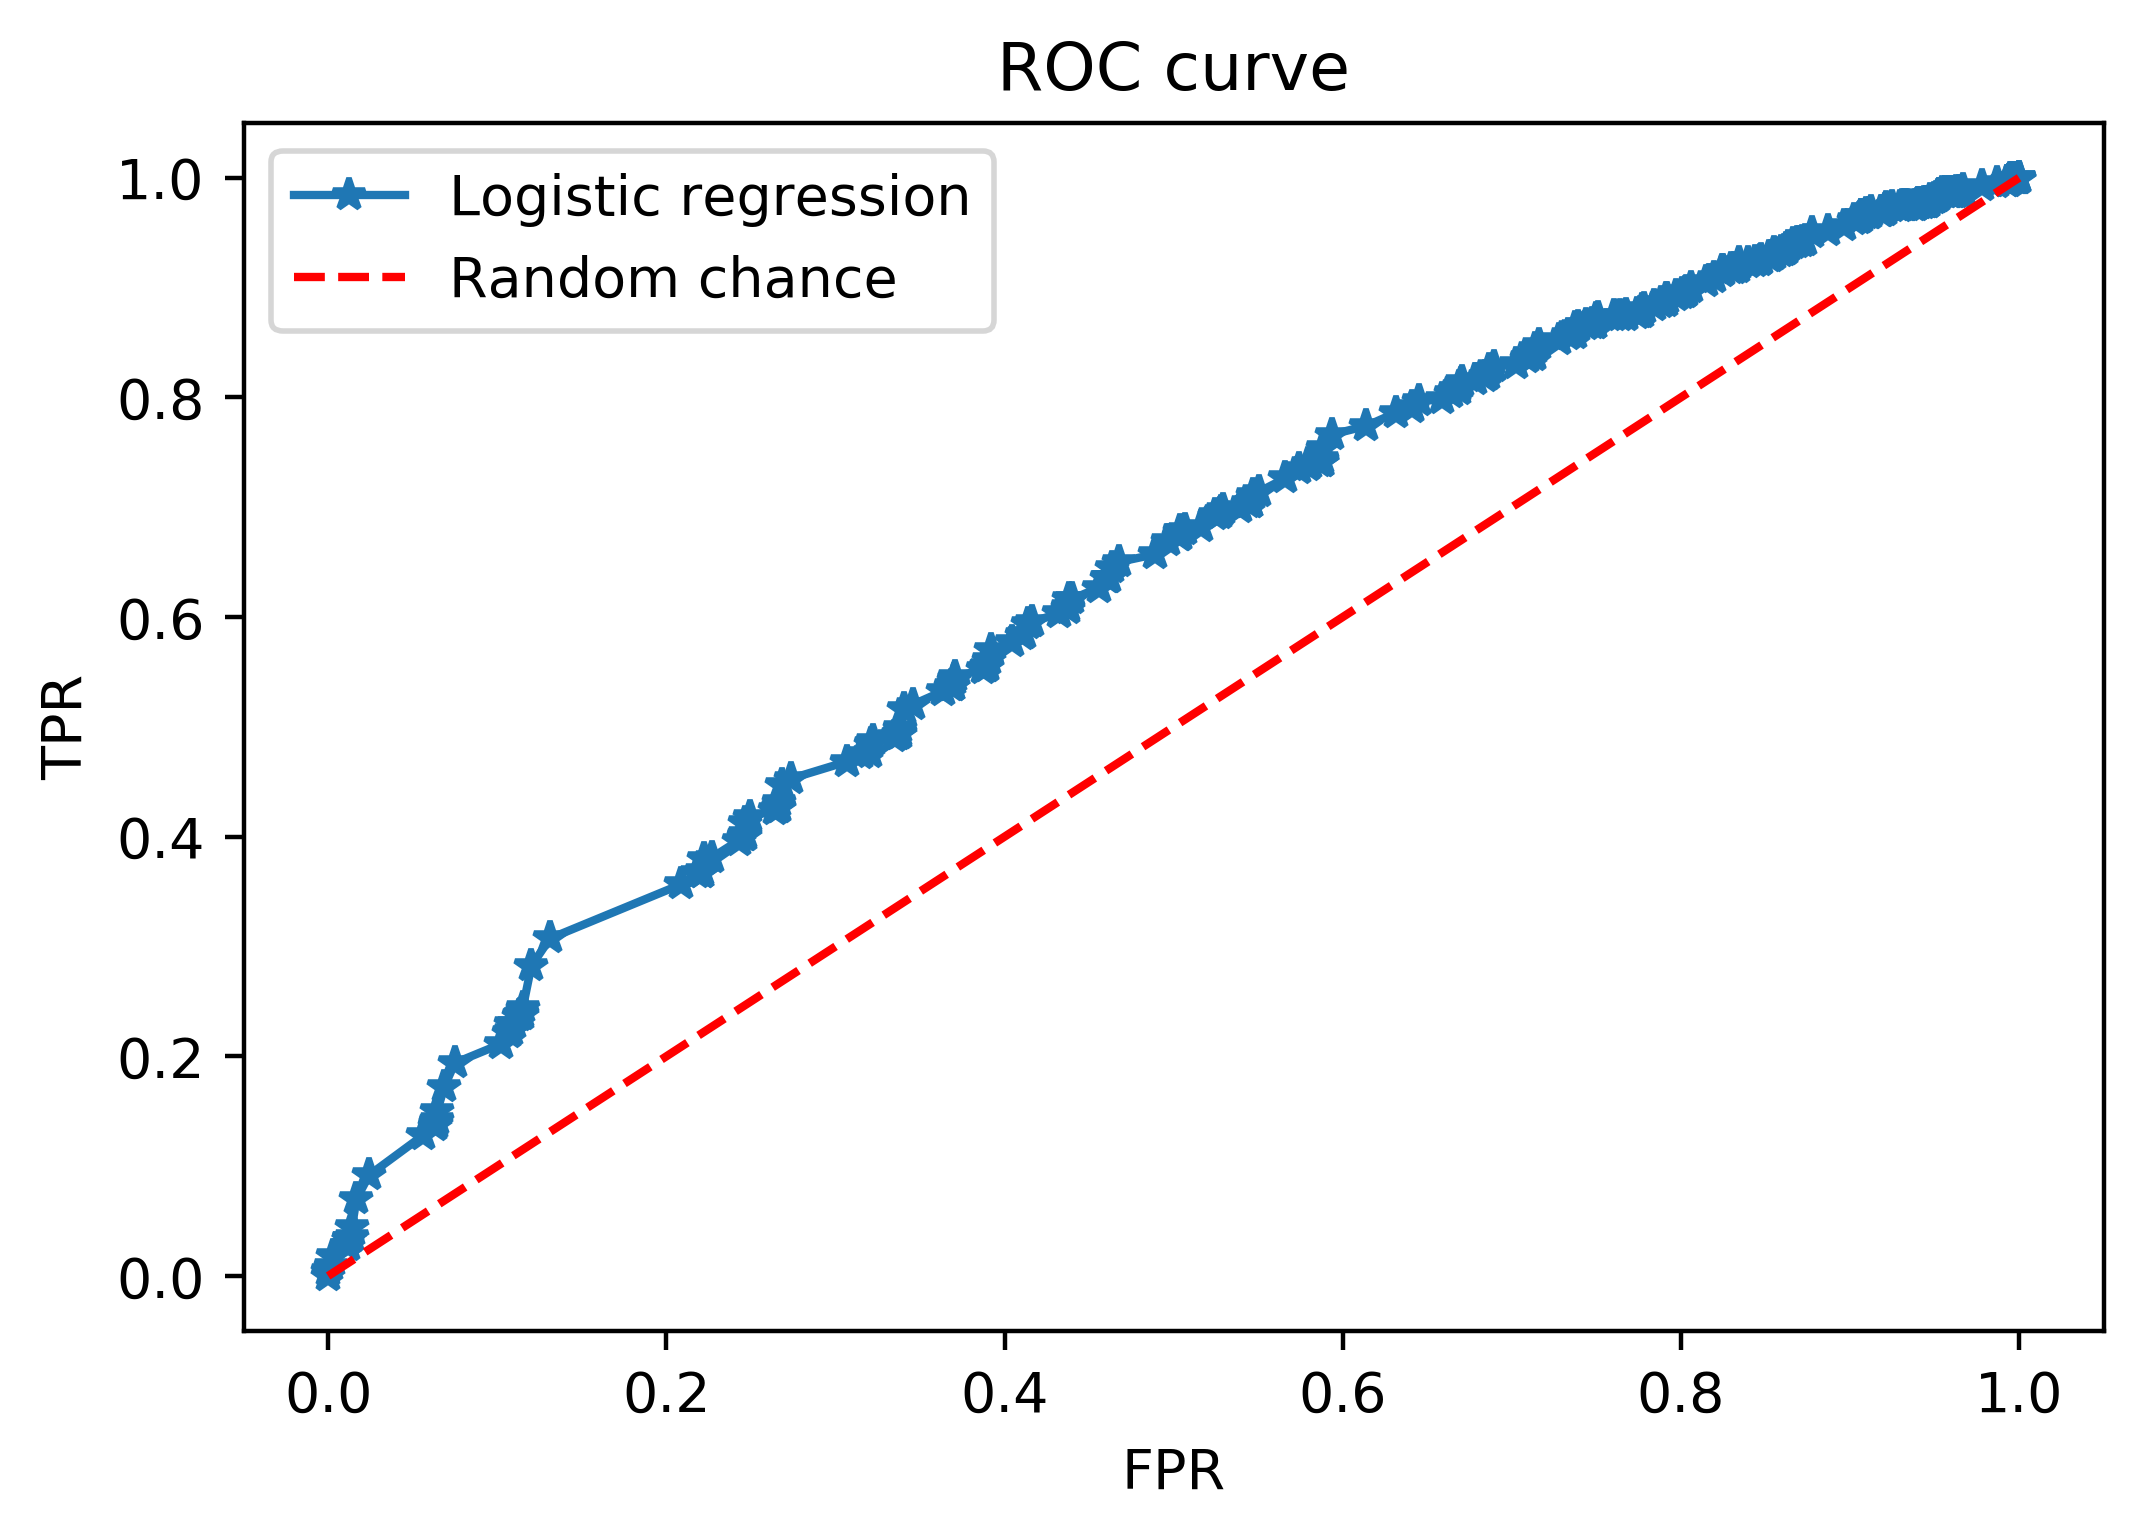

In [27]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [28]:
metrics.roc_auc_score(y_test, pos_proba)

0.627207450280691

In [29]:
# Use manually calculated predicted probabilities to calculate ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, cal_pred_prob)

Text(0.5, 1.0, 'ROC curve')

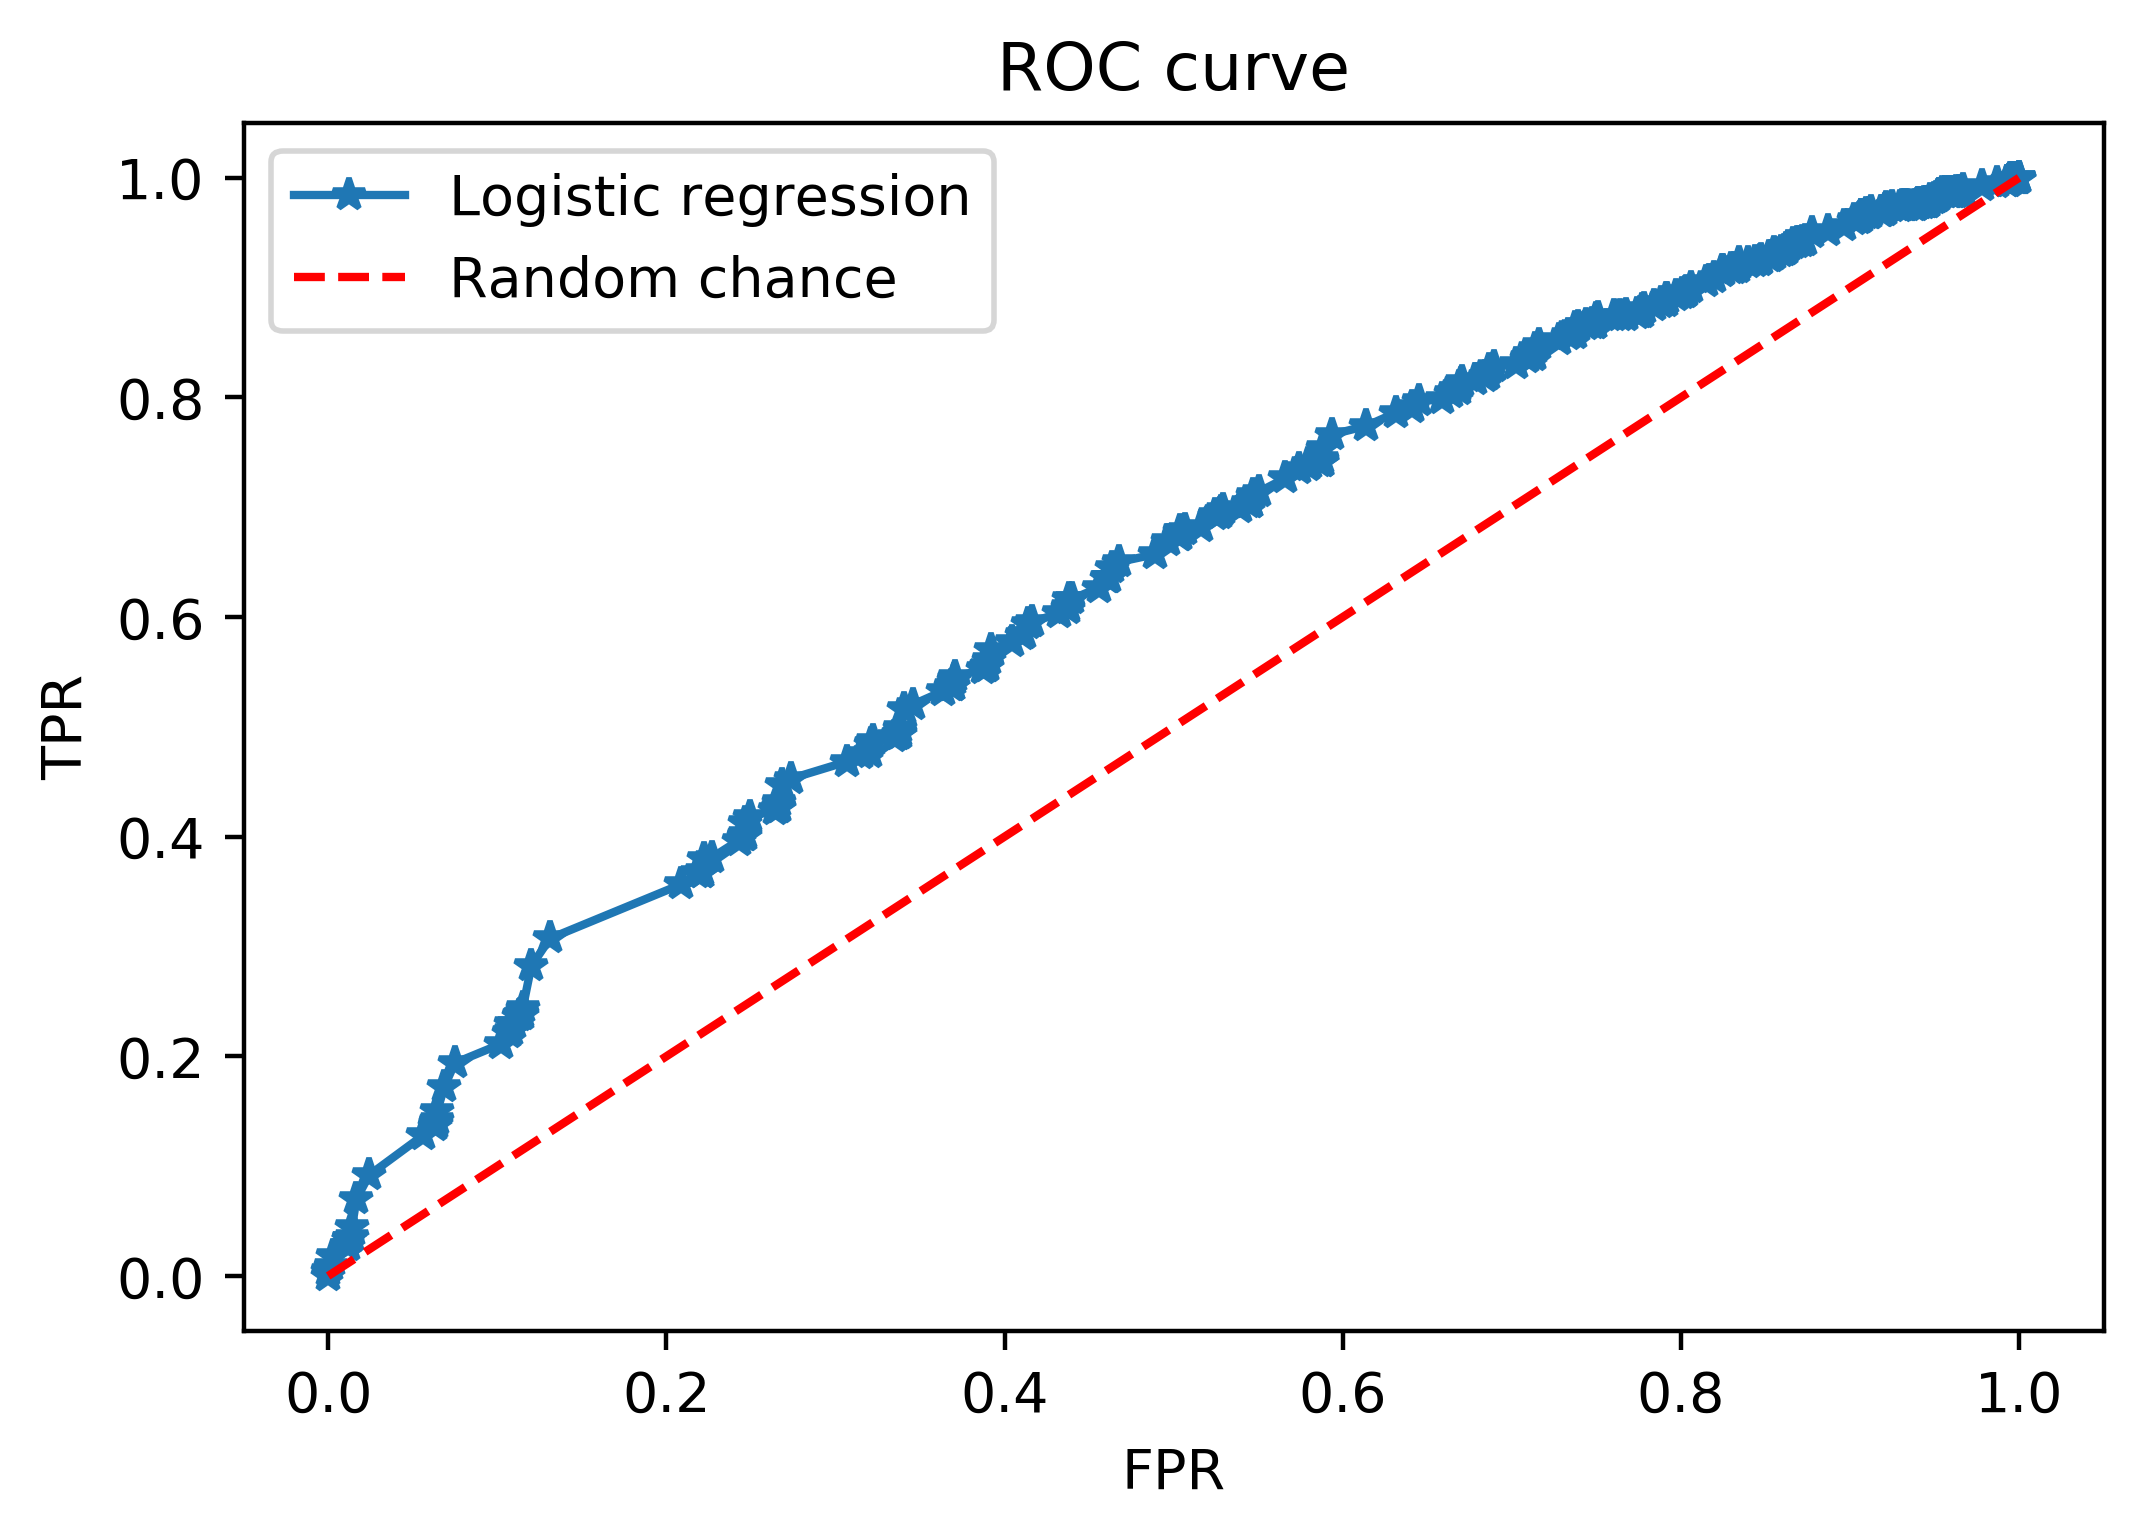

In [30]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [31]:
metrics.roc_auc_score(y_test, cal_pred_prob)

0.627207450280691